# Exploratory data analysis (EDA)

The purpose of this EDA is to find interesting information about job offers data and also to find out what the earnings in the USA look like. 

Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Reading data set which I previously scraped from simplyhired.com and cleaned.

In [2]:
df = pd.read_excel('D:/PROJEKTY-PY/salary_prediction/data-cleaned-sh.xlsx', index_col=0)

Displaying several rows of data.

In [3]:
df.head()

,title,min_salary,max_salary,avg_salary,remote_work,state,rating,name,city
0,Entry Level Data Scientist,58000,74000,66000,In the office,TX,-1.0,toyota connected north america,plano
1,Data Scientist - Entry Level,71000,97000,84000,In the office,CA,-1.0,numerdox,sacramento
2,Data Scientist,110000,160000,135000,In the office,CA,3.8,pg&e corporation,san francisco
3,"Data Scientist, Analytics (University Grad)",45000,57000,51000,In the office,CA,4.1,facebook,menlo park
4,Data Scientist - REMOTE,84000,120000,102000,In the office,IA,4.0,john deere,johnston


This dataset contains 9 columns, 830 rows. There is four columns contains numerical values - min_salary, max_salary, avg_salary and rating. Each job description has a minimum and maximum payment amount. I used this values to creat average salary column (avg_salary). A rating is simply a company review available on a website. Not all companies are rated. I marked the lack of evaluation as '-1'. In other columns we have information about job title, company name, city and state where company is located and also it is remote offer or not.   

### Average salary by state

The most paid jobs are in CA average salary: 117301.82926829268
The worst paid jobs are in MT average salary: 64000.0


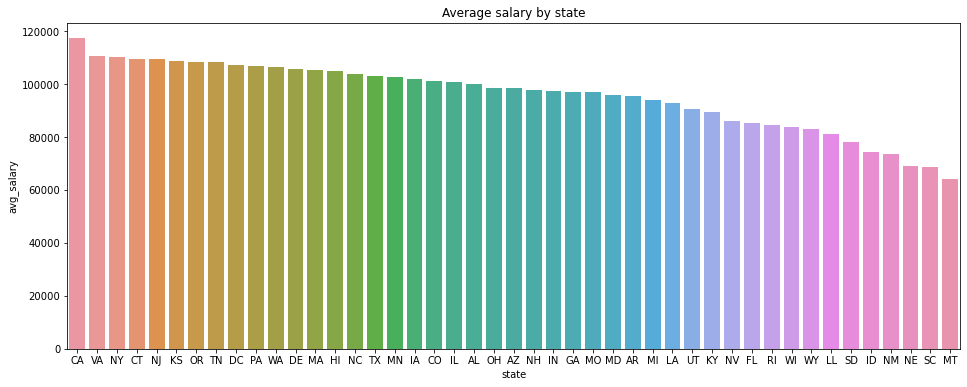

In [4]:
blank_remove_st = df[df['state']!='blank']
grouped_sal_st = blank_remove_st.groupby('state')['avg_salary'].mean().sort_values(ascending=False)
print("The most paid jobs are in", grouped_sal_st.index[0], "average salary:", grouped_sal_st[0])
print("The worst paid jobs are in", grouped_sal_st.index[-1], "average salary:", grouped_sal_st[-1])
plt.figure(figsize=(16, 6))
plt.title('Average salary by state')
chart = sns.barplot(x=grouped_sal_st.index, y=grouped_sal_st)

### Percentage distribution of stationary and remote job offers


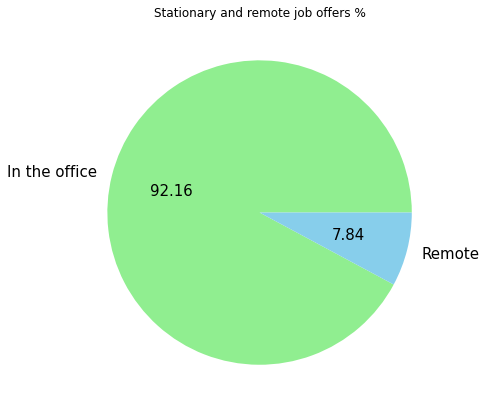

In [5]:
chart = df.groupby('remote_work').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 15},
                                  colors=['lightgreen', 'skyblue'], ylabel='')
fig = plt.gcf()
plt.title('Stationary and remote job offers %')
fig.set_size_inches(7,7)

### Comparison of average salary in remote and stationary work. 

In the office: 105946.15384615384
Remote: 105876.96335078534


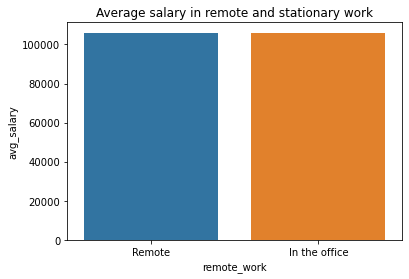

In [27]:
grouped_sal_rem = df.groupby('remote_work')['avg_salary'].mean().sort_values(ascending=False)
chart = sns.barplot(x=grouped_sal_rem.index, y=grouped_sal_rem).set_title('Average salary in remote and stationary work')
print('In the office:', grouped_sal_rem[0])
print('Remote:', grouped_sal_rem[1])

In the chart above, we can see that there is no significant difference in salary for remote and stationary work.

### Average salary histogram

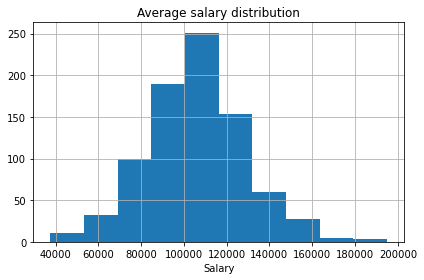

In [7]:
df.avg_salary.hist()
plt.title('Average salary distribution')
plt.xlabel('Salary')
plt.tight_layout()
# test normalnosci rozkladu dorobic

We can see that salary is close to normal distribution.

### Company ratings histogram

The number that appears the most: 
 ModeResult(mode=array([4.0999999]), count=array([81]))


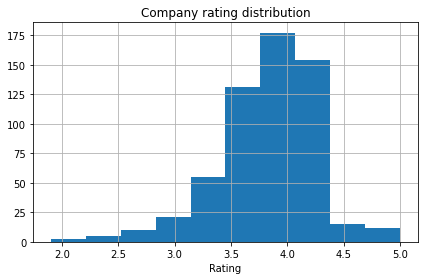

In [8]:
rat = df['rating'][df['rating']!=-1]
rat.hist()
print('The number that appears the most:','\n',stats.mode(rat))
plt.xlabel('Rating')
plt.title('Company rating distribution')
plt.tight_layout()

With this information we can see that the ratings are skewed left. The most common rating is 4.09 and it occurs in data set 81 times. 

### Average salary boxplot

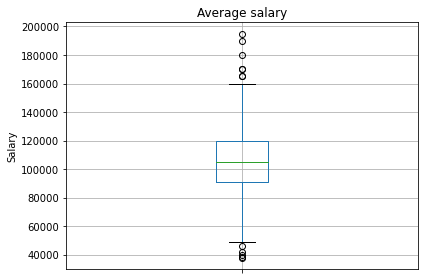

In [9]:
df.boxplot(column = ['avg_salary']).set(xticklabels=[])
plt.ylabel('Salary')
plt.title('Average salary')
plt.tight_layout()

This boxplot shows that the middle value of the dataset is around 105000. We have a few outliers at the top in range 160000-200000 and at the bottom around 40000.

### Ratings boxplot

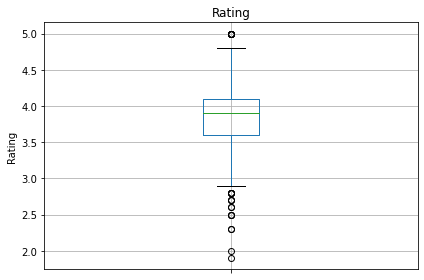

In [25]:
df[df.rating != -1].boxplot(column = 'rating').set(xticklabels=[])
plt.ylabel('Rating')
plt.title('Rating')
plt.tight_layout()

This boxplot shows that the middle value of the dataset is around 4.0. We have a lot of outliers with a low rating.

### Average salary with different company ratings

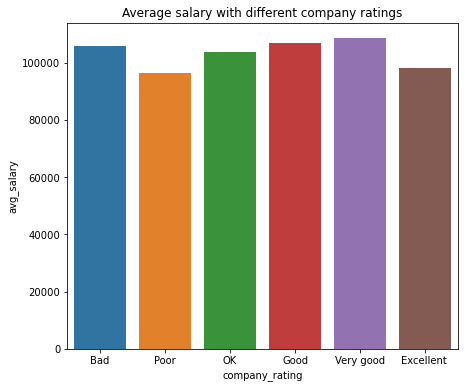

In [11]:
rat = df['rating'][df['rating']!=-1]
group_names = ['Bad', 'Poor', 'OK','Good','Very good','Excellent ']
start = rat.min()
stop =rat.max()
bins = np.linspace(start, stop, num=7)
df['company_rating'] = pd.cut(rat, bins, labels=group_names)
ndf=df.groupby('company_rating', as_index=False)['avg_salary'].mean()
plt.figure(figsize=(7, 6))
plt.title('Average salary with different company ratings')
chart = sns.barplot(x=ndf['company_rating'], y=ndf['avg_salary'])

### Salary and rating coleration - Heatmap

In [12]:
df[['avg_salary', 'rating']].corr()

,avg_salary,rating
avg_salary,1.000000,0.044738
rating,0.044738,1.000000


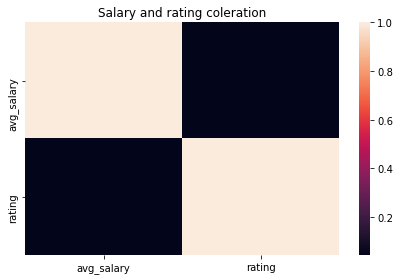

In [13]:
pl = sns.heatmap(df[['avg_salary', 'rating']].corr())
pl.set_title('Salary and rating coleration')
plt.tight_layout()

Analyzing barplot and heatmap we can see that the values are not related to each other and cannot be used for further analysis using machine learning to predict salary based on ratings.

### Number of job offers in top 20 cities 

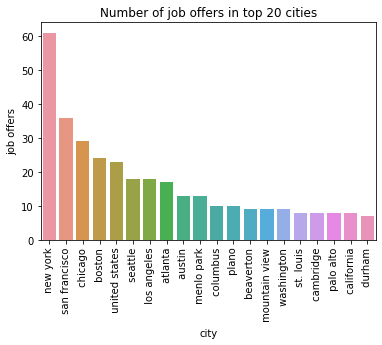

In [20]:
blank_remove_ci = df[df['city']!='blank']
jobs = blank_remove_ci['city'].value_counts()[:20]
chart = sns.barplot(x=jobs.index, y=jobs)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Number of job offers in top 20 cities')
plt.xlabel('city')
plt.ylabel('job offers')
plt.show()

On the basis of the chart, it can be seen that in New york we have the most job offers in the field of data science.

### Number of job offers in top 20 states

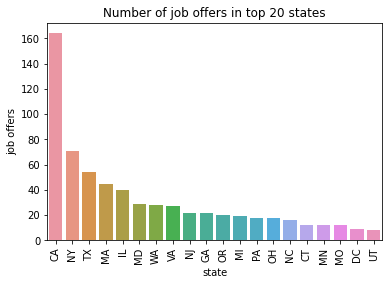

In [15]:
blank_remove_st = df[df['state']!='blank']
jobs = blank_remove_st['state'].value_counts()[:20]
chart = sns.barplot(x=jobs.index, y=jobs)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Number of job offers in top 20 states')
plt.xlabel('state')
plt.ylabel('job offers')
plt.show()

On the basis of the chart, it can be seen that in the state of California we have the most job offers in the field of data science.

### Average salary in a given state top 10

In [16]:
pd.pivot_table(blank_remove_st, index = 'state', values = 'avg_salary').sort_values('avg_salary', ascending = False)[:10] # top 10 i top -10

,avg_salary
state,
CA,117301.829268
VA,110462.962963
NY,110274.647887
CT,109500.000000
NJ,109454.545455
KS,108750.000000
OR,108450.000000
TN,108333.333333
DC,107055.555556


The highest earnings are in the state of California where the highest number of job offers was also noticed. 

### Average salary in a given state - 10 from the end

In [17]:
pd.pivot_table(blank_remove_st, index = 'state', values = 'avg_salary').sort_values('avg_salary', ascending = False)[-10:]

,avg_salary
state,
RI,84500.000000
WI,83714.285714
WY,83000.000000
LL,81000.000000
SD,78000.000000
ID,74500.000000
NM,73500.000000
NE,69000.000000
SC,68500.000000


The lowest earnings are in the state of Montana where number of job offers was very low.

### The percentage breakdown of salary into small, medium and large groups

In [18]:
group_names = ['Low', 'Mid', 'High']
start = df['avg_salary'].min()
stop = df['avg_salary'].max()
bins = np.linspace(start, stop, num=4)
df['salary_group'] = pd.cut(df.avg_salary, bins, labels=group_names)

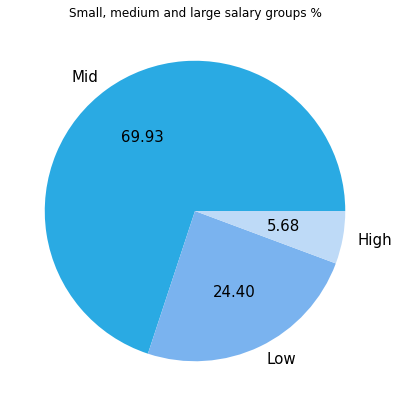

In [26]:
df['salary_group'].value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 15},
                                  colors=['#2AAAE3', '#7AB3EF', '#BEDAF7'])
plt.title('Small, medium and large salary groups %')
plt.ylabel('')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(6,6)

The vast majority are in the middle salary range and only a small percentage earn the most. 

### Conclusion:
- In the state of California we have the most offers. The most numbers of offers has also city - New York. This may be due to some extent to the fact that the maintenance costs in these places are very high.
- If we are looking for a job, we should not expect that the company's rating will have an impact on salary. 
- If we are wondering how much we will earn, it is most likely that we will be in the group of people with average earnings.
- If you prefer remote work, you don't have to worry that it will be less paid than working in the office. 